In [1]:
%load_ext dotenv
%dotenv 

# load_dotenv()
import os
import sys
sys.path.append(os.getenv('SRC_DIR'))
from logger import get_logger
_logs = get_logger(__name__)

In [2]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import os
from glob import glob

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
ft_dir = os.getenv("FEATURES_DATA")
ft_glob = glob(ft_dir+'/*.parquet')
df = dd.read_parquet(ft_glob).compute().reset_index()

# Sampling in Python

+ There are different packages that allow sampling.
+ A practical approach is to use pandas/Dask sampling methods.

## Random Sampling

+ Sample n rows from a dataframe with [`df.sample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html).

```
DataFrame.sample(
    n=None, frac=None, replace=False, weights=None, 
    random_state=None, axis=None, ignore_index=False
    )
```

In [4]:
df.sample(n = 5)

Price,Ticker,Date,Adj Close,Close,High,Low,Open,Volume,Year,Close_lag_1
1321757,PH,2002-05-20,NaN,22.782467,23.188971,22.608903,23.188971,515400.0,2002,23.079348
884896,ALGN,2003-01-23,NaN,3.230000,3.300000,3.200000,3.200000,64400.0,2003,3.220000
2739139,CMCSA,2004-11-04,NaN,6.973314,7.041611,6.846141,6.864982,25427100.0,2004,6.841434
1176849,GL,2019-03-04,NaN,78.330078,79.384869,77.636384,78.881232,516400.0,2019,78.748215
1384850,TER,2005-06-07,NaN,12.092350,12.526861,12.083105,12.203289,1842000.0,2005,12.138579


In [5]:
# select_tickers = df['ticker'].unique().tolist()[0:9]
select_tickers = ['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']
select_tickers

['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']

In [6]:
# idx = df['ticker'].isin(select_tickers) - capitalized to fix the issue 
idx = df['Ticker'].isin(select_tickers)
small_df = df[idx]
simple_sample_dt = small_df.sample(frac = 0.1)
simple_sample_dt.shape, small_df.shape

((5677, 10), (56772, 10))

Look at the distribution of tickers.

In [7]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
import matplotlib.pyplot as plt

<Axes: xlabel='Ticker'>

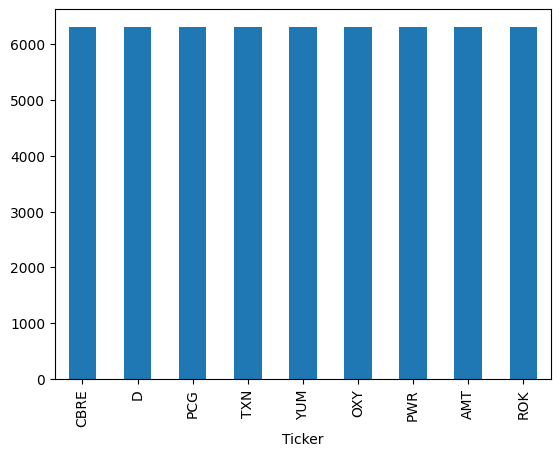

In [9]:
small_df['Ticker'].value_counts().plot(kind='bar')

<Axes: xlabel='Ticker'>

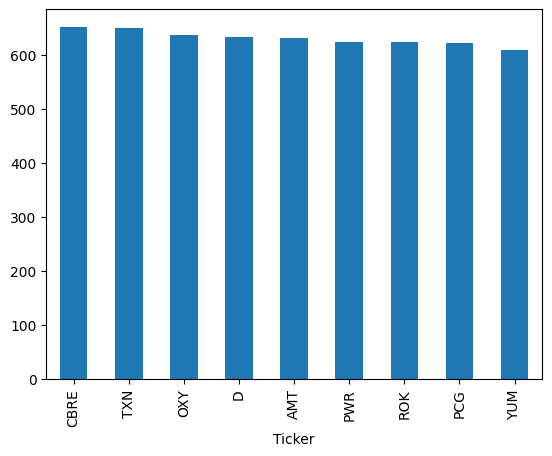

In [10]:
simple_sample_dt['Ticker'].value_counts().plot(kind='bar')

## Stratified Sampling

+ Use `groupby()` and `.sample()` for stratified sampling.

<Axes: xlabel='Ticker'>

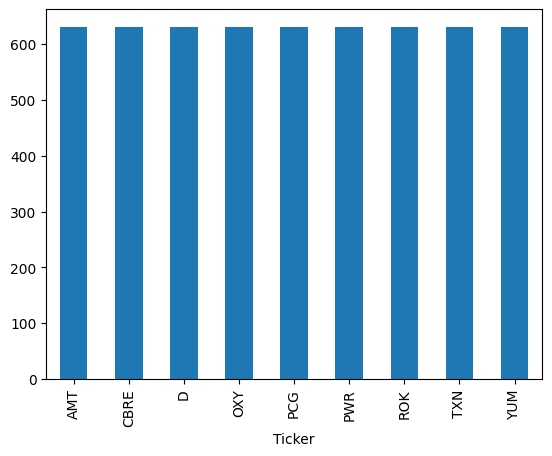

In [11]:
strat_sample_dt = small_df.groupby(['Ticker']).sample(frac = 0.1)
strat_sample_dt['Ticker'].value_counts().plot(kind='bar')

# Sampling in Dask

+ Stratified sampling in `dask` can be achieved with `groupby().apply()` and a lambda function.

/var/folders/nc/pbf0pj7114jg0dltbbtyzj0m0000gn/T/ipykernel_50092/2388710987.py:2: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  strat_sample_dd_dt = (dd_dt


<Axes: xlabel='Ticker'>

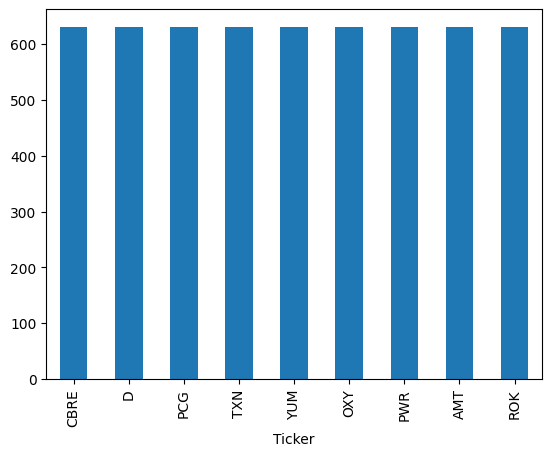

In [12]:
dd_dt = dd.read_parquet(ft_glob)
strat_sample_dd_dt = (dd_dt
                      .groupby('Ticker', group_keys=False)
                      .apply(lambda x: x.sample(frac = 0.1))
                      .compute()
                      .reset_index())
strat_sample_dd_dt[strat_sample_dd_dt['Ticker'].isin(select_tickers)]['Ticker'].value_counts().plot(kind='bar')